In [19]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
# Specify the file path
file_path = "C:/CryptoClustering/Resources/crypto_market_data.csv"

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(file_path, index_col="coin_id")

# Display the first few rows
print(df_market_data.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Display the first few rows of the scaled DataFrame
print(df_market_data_scaled.head())



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [23]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [24]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [25]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [26]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


In [104]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original DataFrame
# Set the coin_id column as index


# Display the scaled DataFrame
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Copy the crypto names from the original DataFrame
df_market_data_scaled['Crypto Name'] = df_market_data.index

# Set the coin_id column as index (already set during normalization)
df_market_data_scaled.set_index('Crypto Name', inplace=True)

# Display the scaled DataFrame
print(df_market_data_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
Crypto Name                                                             
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
Crypto Name                                                              
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

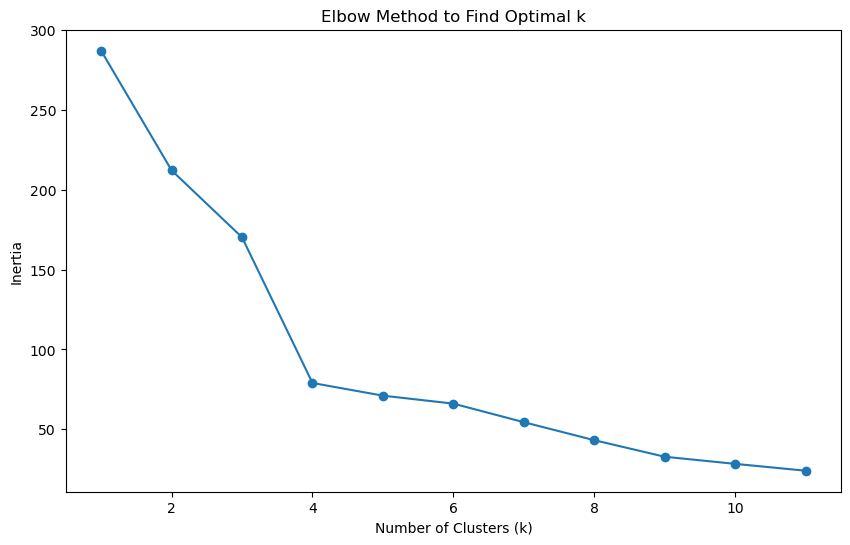

In [29]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# Loop through each k value to calculate inertia
for k in k_values:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(df_market_data_scaled)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

In [30]:
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


In [31]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** K=4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [32]:
# Initialize the KMeans model with k=4
kmeans = KMeans(n_clusters=4, random_state=42)


In [33]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)

c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [34]:
# Predict the clusters
crypto_clusters = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.


In [35]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_clusters = df_market_data_scaled.copy()

In [36]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_clusters['Cluster'] = crypto_clusters

# Display the copy of the scaled DataFrame

# Display the DataFrame with clusters
print(df_market_data_scaled_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [37]:
pip install hvplot bokeh panel


Note: you may need to restart the kernel to use updated packages.


In [38]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Create a scatter plot using hvPlot
df_market_data_scaled_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['Cluster'],
    width=800,
    height=400,
    title="Cryptocurrency Clusters (k=4)"
)

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

In [55]:
pip install jupyter_bokeh


  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/148.6 kB ? eta -:--:--
   -------- ------------------------------ 30.7/148.6 kB 660.6 kB/s eta 0:00:01
   -------------------------------------- - 143.4/148.6 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 148.6/148.6 kB 1.8 MB/s eta 0:00:00
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterl

In [57]:
print(df_market_data_scaled.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [59]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [61]:
pn.panel(scatter_plot).show()


Launching server at http://localhost:60172


In [58]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with the optimal k value (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(df_market_data_scaled)

# Add the cluster labels to the DataFrame
df_market_data_scaled['Cluster'] = clusters


c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
import panel as pn
pn.extension()

scatter_plot = df_market_data_scaled.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['Cluster'],
    width=800,
    height=400,
    title="Cryptocurrency Clusters (k=4)"
)

# Render the plot
pn.panel(scatter_plot).show()


Launching server at http://localhost:63731


---

### Optimize Clusters with Principal Component Analysis.

In [65]:
# Create a PCA model instance and set `n_components=3`.

from sklearn.decomposition import PCA

# Step 1: Create a PCA model instance with n_components=3
pca = PCA(n_components=3)

In [66]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# Step 2: Fit and transform the scaled data using PCA
pca_data = pca.fit_transform(df_market_data_scaled)


# down to three principal components.
# Step 3: Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(
    data=pca_data,
    columns=['PC1', 'PC2', 'PC3']
)

# View the scaled PCA data
# Step 4: View the scaled PCA data
print(pca_df.head())

        PC1       PC2       PC3
0 -1.585139  0.134394  0.545621
1 -1.322581  0.054494  1.115709
2  0.266335 -0.536409 -0.796946
3  0.257225 -0.592013 -0.646529
4 -2.952250  0.422372  1.267894


In [67]:
# Retrieve the explained variance to determine how much information
# Step 5: Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


# can be attributed to each principal component.
# Step 6: Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratio: [0.37005408 0.32322221 0.19115222]
Cumulative Explained Variance: [0.37005408 0.69327629 0.88442851]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 88.44%.

In [68]:
# Create a new DataFrame with the PCA data.
# Create a new DataFrame with the PCA-transformed data
df_pca = pd.DataFrame(
    data=pca_data,
    columns=['PC1', 'PC2', 'PC3'],  # Assign column names for the principal components
    index=df_market_data_scaled.index  # Use the original index (coin_id)
)

# Copy the crypto names from the original scaled DataFrame
df_pca['Crypto Name'] = df_market_data.index

# Set the coin_id column as index
df_pca.set_index('Crypto Name', inplace=True)

# Display the scaled PCA DataFrame
print(df_pca.head())

                   PC1       PC2       PC3
Crypto Name                               
bitcoin      -1.585139  0.134394  0.545621
ethereum     -1.322581  0.054494  1.115709
tether        0.266335 -0.536409 -0.796946
ripple        0.257225 -0.592013 -0.646529
bitcoin-cash -2.952250  0.422372  1.267894


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

Inertia values: [287.00783759231985, 198.6755078870047, 111.97202664282966, 43.20587871955299, 34.50557792364347, 29.83846069881802, 19.777319711159212, 18.56036839692317, 14.5677438396426, 11.634955754884842, 7.970250079411331]


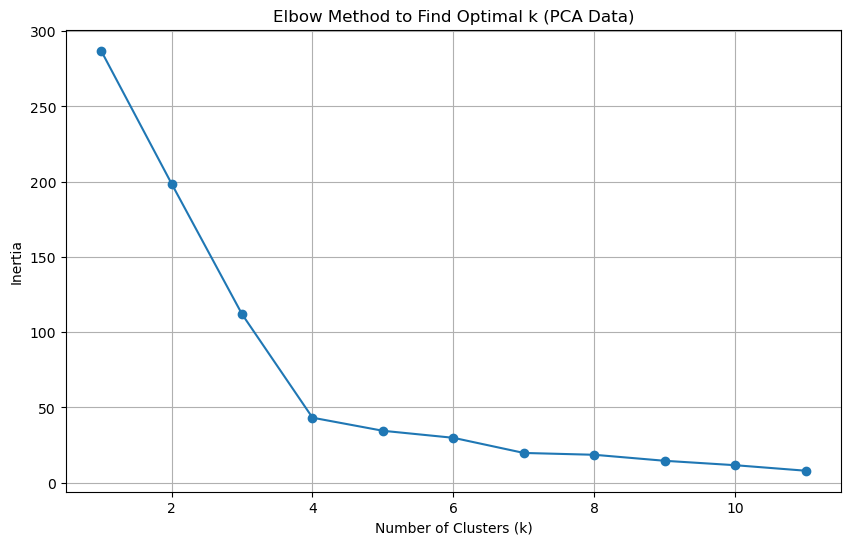

In [78]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42)

        # Fit the model to the PCA-transformed data
        kmeans.fit(pca_df)

        # Append the model's inertia to the inertia list
        inertia.append(kmeans.inertia_)
    except Exception as e:
        print(f"Error for k={k}: {e}")
        break

# Debug: Print the inertia values
print("Inertia values:", inertia)

# Ensure that the lengths of k_values and inertia match
if len(k_values) == len(inertia):
    # Plot a line chart with all the inertia values
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to Find Optimal k (PCA Data)')
    plt.grid()
    plt.show()
else:
    print("Mismatch in dimensions between k_values and inertia.")


In [80]:
# Create a dictionary with the data to plot the Elbow curve
# Create a dictionary with k-values and their corresponding inertia values
elbow_data_dict = {
    'k_values': k_values,
    'inertia': inertia
}

# Debug: Print the dictionary
print(elbow_data_dict)


# Create a DataFrame with the data to plot the Elbow curve
# Create a DataFrame from the dictionary
elbow_df = pd.DataFrame(elbow_data_dict)

# Display the DataFrame
print(elbow_df.head())


{'k_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'inertia': [287.00783759231985, 198.6755078870047, 111.97202664282966, 43.20587871955299, 34.50557792364347, 29.83846069881802, 19.777319711159212, 18.56036839692317, 14.5677438396426, 11.634955754884842, 7.970250079411331]}
   k_values     inertia
0         1  287.007838
1         2  198.675508
2         3  111.972027
3         4   43.205879
4         5   34.505578


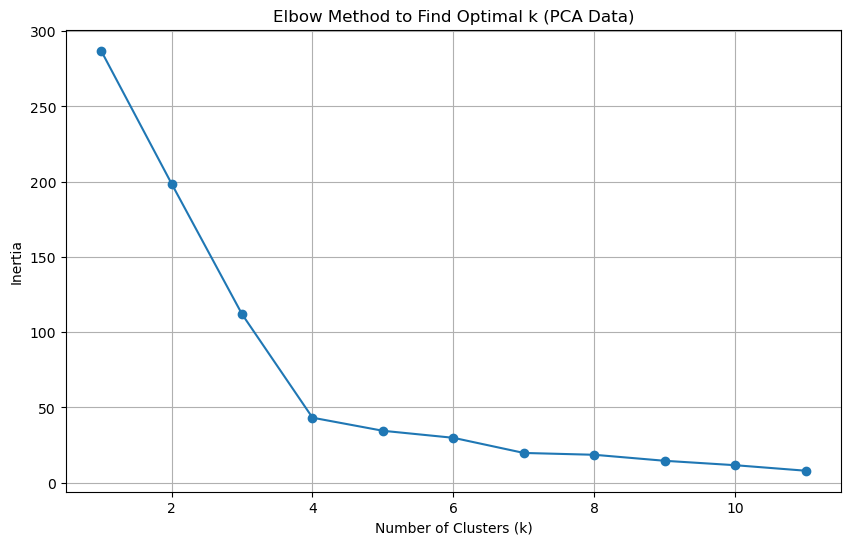

In [81]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot a line chart to visualize the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k (PCA Data)')
plt.grid()
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data is 4. This can be determined by observing the "elbow point" in the plotted Elbow curve, where the inertia significantly decreases and then levels off.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**   No, it does not differ. The optimal value for k is 4 in both cases, indicating consistency in clustering results between the original data and the PCA-transformed data. This suggests that reducing the dimensionality to three principal components did not alter the number of clusters needed for effective grouping.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [82]:
#Optional k value (e.g., from Elbow plot)
optimal_k = 4  # Replace with the best k value identified

In [83]:
# Initialize the K-Means model using the best value for k
# Initialize the K-Means model using the optimal k value
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)

In [84]:
# Fit the K-Means model using the PCA-transformed data
clusters_pca = kmeans_pca.fit_predict(pca_df)

c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters_pca

# Print the resulting array of cluster values.
# Display the updated PCA DataFrame
print(pca_df.head())

        PC1       PC2       PC3  Cluster
0 -1.585139  0.134394  0.545621        0
1 -1.322581  0.054494  1.115709        0
2  0.266335 -0.536409 -0.796946        1
3  0.257225 -0.592013 -0.646529        1
4 -2.952250  0.422372  1.267894        0


In [86]:
# Create a copy of the scaled PCA DataFrame
pca_df_clusters = pca_df.copy()


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
# Add a new column for cluster labels
pca_df_clusters['Cluster'] = clusters


# Display the copy of the scaled PCA DataFrame
# Display the updated PCA DataFrame with clusters
print("PCA DataFrame with Clusters:")
print(pca_df_clusters.head())


PCA DataFrame with Clusters:
        PC1       PC2       PC3  Cluster
0 -1.585139  0.134394  0.545621        0
1 -1.322581  0.054494  1.115709        0
2  0.266335 -0.536409 -0.796946        2
3  0.257225 -0.592013 -0.646529        2
4 -2.952250  0.422372  1.267894        0


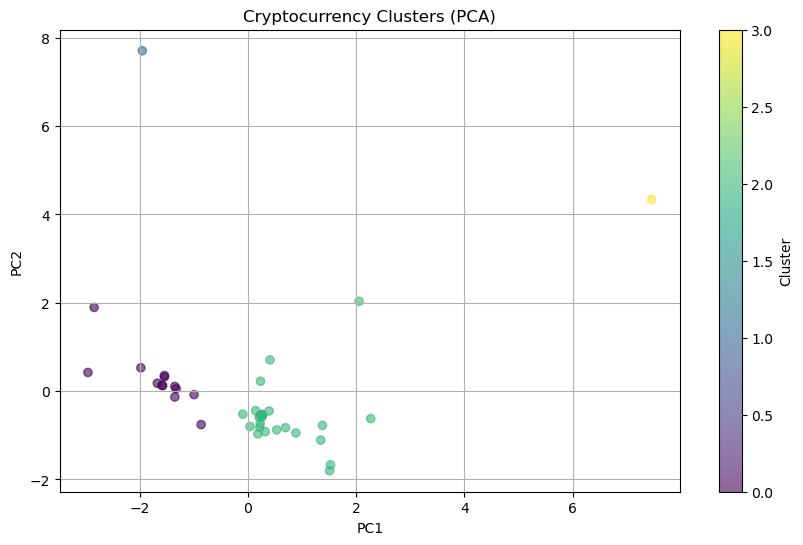

Launching server at http://localhost:59050


In [90]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


# Create a scatter plot using hvPlot
plt.figure(figsize=(10, 6))
plt.scatter(pca_df_clusters['PC1'], pca_df_clusters['PC2'], c=pca_df_clusters['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cryptocurrency Clusters (PCA)')
plt.grid(True)
plt.show()

# Render the plot
import panel as pn
pn.extension()
pn.serve(scatter_plot_pca)


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
import panel as pn
pn.extension(comms='vscode')  # Ensures compatibility with VS Code


In [92]:
# Assuming you computed inertia for the original data earlier:
inertia_original = []  # Initialize an empty list to store inertia values

# Loop to compute inertia values for the original scaled data
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)  # Use the original scaled DataFrame
    inertia_original.append(kmeans.inertia_)


c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [94]:
# Composite plot to contrast the Elbow curves
elbow_data = pd.DataFrame({
    'k_values': k_values,
    'Original Inertia': inertia_original,
    'PCA Inertia': inertia
})

elbow_plot = elbow_data.hvplot.line(
    x='k_values',
    y=['Original Inertia', 'PCA Inertia'],
    width=800,
    height=400,
    title="Elbow Curve Comparison (Original vs. PCA)"
)

# Render the plot
import panel as pn
pn.extension(comms='vscode')  # Ensures compatibility with VS Code
pn.serve(elbow_plot, port=5006, show=True)



#pn.panel(elbow_plot).show()


Launching server at http://localhost:5006


In [99]:
# Initialize the K-Means model using the best k value (e.g., 4)
kmeans_pca = KMeans(n_clusters=4, random_state=42)

# Fit the model and predict the clusters using PCA data
pca_clusters = kmeans_pca.fit_predict(df_pca)

# Debug: Check the cluster labels
print(pca_clusters)


[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [100]:
# Create a copy of the PCA DataFrame
df_pca_clusters = df_pca.copy()

# Add the cluster labels to the DataFrame
df_pca_clusters['Cluster'] = pca_clusters

# Display the updated DataFrame
print(df_pca_clusters.head())


                   PC1       PC2       PC3  Cluster
Crypto Name                                        
bitcoin      -1.585139  0.134394  0.545621        0
ethereum     -1.322581  0.054494  1.115709        0
tether        0.266335 -0.536409 -0.796946        1
ripple        0.257225 -0.592013 -0.646529        1
bitcoin-cash -2.952250  0.422372  1.267894        0


In [101]:
scatter_plot_pca = df_pca_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['Cluster'],
    width=400,
    height=400,
    title="PCA Data Clusters"
)


In [96]:
scatter_plot_original = df_market_data_scaled_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['Cluster'],
    width=400,
    height=400,
    title="Original Data Clusters"
)


In [103]:
# Composite plot to contrast the clusters
cluster_comparison = (scatter_plot_original + scatter_plot_pca).cols(1)


# Show composite plots
#pn.panel(elbow_plot + cluster_comparison).show()
pn.serve(cluster_comparison, port=5007, show=True)


Launching server at http://localhost:5007


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**   Using fewer features to cluster the data with K-Means has the following impacts:

Simplicity in Clustering: The PCA-transformed data reduces the dimensionality of the dataset, simplifying the clustering process by focusing on the most important variance in the data. This can lead to faster computations and reduced computational complexity.

Potential Loss of Information: Although PCA retains the majority of the variance, some information from the original features may be lost. This might result in less precise clustering compared to the original data.

Improved Visualization: Reducing the data to fewer dimensions (e.g., 2 or 3 principal components) makes it easier to visualize and interpret the clustering results.

Consistency of Clusters: In this analysis, the clustering results from the PCA data and the original scaled data are consistent (assuming the same k is chosen), indicating that PCA preserves enough variance to maintain meaningful cluster structures.

Overall, using fewer features (via PCA) strikes a balance between computational efficiency and maintaining sufficient information for meaningful clustering.